# Heart Disease UCI Dataset Test

This notebook tests the download and loading of the UCI Heart Disease dataset from Kaggle.

In [1]:
# Install required packages
%pip install kagglehub pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download the dataset to current directory
print("Downloading UCI Heart Disease dataset...")
cache_path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied heart.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/heart_disease_uci


In [3]:
# Check dataset size
total_size = 0
files = os.listdir(path)
for file in files:
    file_path = os.path.join(path, file)
    size = os.path.getsize(file_path)
    total_size += size
    print(f"- {file}: {size/1024:.1f} KB")

print(f"\nTotal dataset size: {total_size/(1024*1024):.2f} MB")

- heart.csv: 37.2 KB
- README.md: 1.0 KB
- dataset_download.ipynb: 233.2 KB

Total dataset size: 0.27 MB


In [4]:
# Load and explore the data
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nData types:\n{df.dtypes}")
    print(f"\nFirst 5 rows:\n{df.head()}")
    print(f"\nTarget distribution:")
    if 'target' in df.columns:
        print(df['target'].value_counts())
    
    # Basic statistics
    print(f"\nBasic statistics:\n{df.describe()}")

Dataset shape: (1025, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     

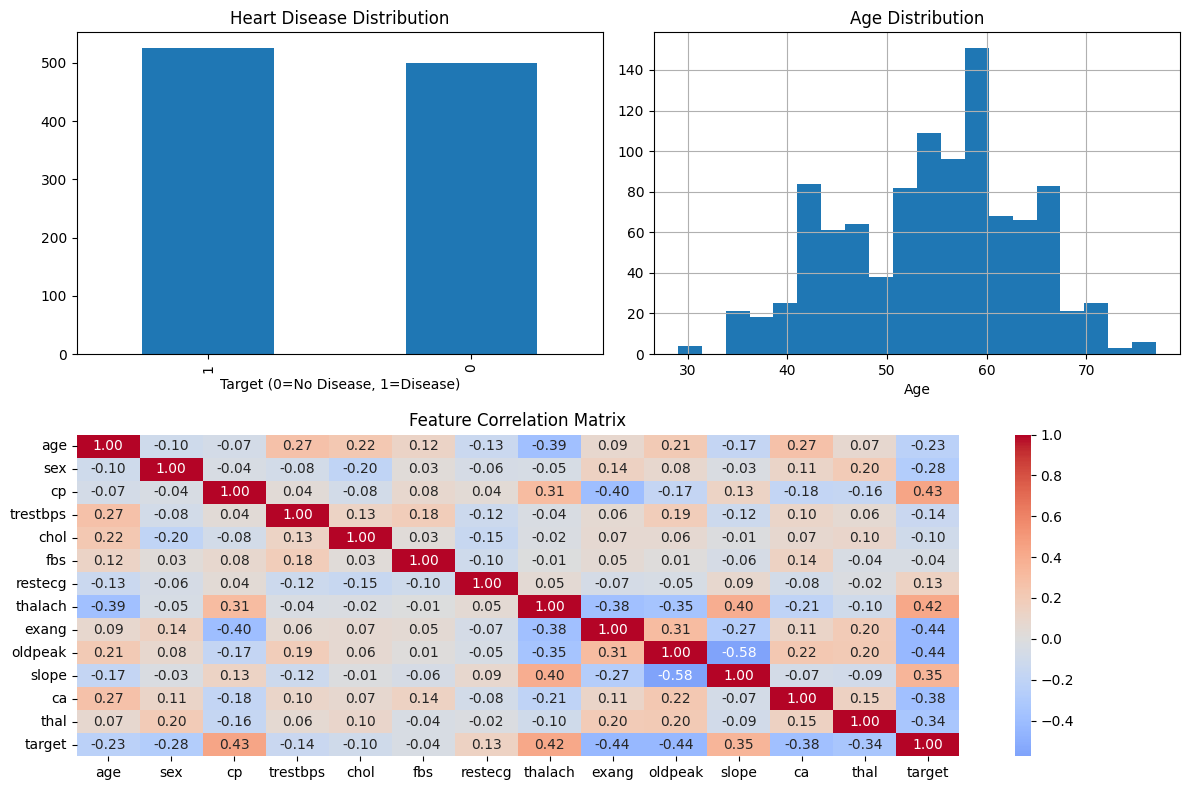

In [5]:
# Create visualizations
if csv_files and len(df) > 0:
    # Target distribution
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    if 'target' in df.columns:
        df['target'].value_counts().plot(kind='bar')
        plt.title('Heart Disease Distribution')
        plt.xlabel('Target (0=No Disease, 1=Disease)')
    
    # Age distribution
    plt.subplot(2, 2, 2)
    if 'age' in df.columns:
        df['age'].hist(bins=20)
        plt.title('Age Distribution')
        plt.xlabel('Age')
    
    # Correlation heatmap
    plt.subplot(2, 2, (3, 4))
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 1:
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Feature Correlation Matrix')
    
    plt.tight_layout()
    plt.show()

In [6]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
print(f"- Size: {total_size/(1024*1024):.2f} MB (Small & manageable!)")
if csv_files:
    print(f"- Records: {df.shape[0]:,}")
    print(f"- Features: {df.shape[1]}")
print("- Use case: Binary classification, cardiovascular health prediction")
print("- Perfect for: Module 5 (Machine Learning), clinical decision support")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/heart_disease_uci
- Size: 0.27 MB (Small & manageable!)
- Records: 1,025
- Features: 14
- Use case: Binary classification, cardiovascular health prediction
- Perfect for: Module 5 (Machine Learning), clinical decision support
